<a href="https://colab.research.google.com/github/JuanSebastianMoralesVilla/IA_REPOSITORY/blob/main/MNIST_taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST (dígitos) solución tradicional

<label style='color:red'> ¡Completar esta celda! </label>

__Integrantes:__

Gonzalo de varona

Sebastian Morales






__Números asignados: 9,7


## Taller 

_Suponga que trabajan para el desarrollo de un sistema de lectura y reconocimiento de dígitos. Para este trabajo le han encomendado la misión de desarrollar el software de detección; para cumplir con el objetivo le han proporcionado un conjunto de fotos en grises con el fin que proponga una solución de programación tradicional, es decir, sin el uso de librerías de aprendizaje de máquina (machine learning). El software que proponga debe tener la capacidad de determinar con un desempeño una muestra de los datos (40%) que le han suministrado_.

**Nota**: puede utilizar técnicas de segmentación, estadística, algebra lineal y la implementación de algoritmos de IA.
***

**Desarrollo y evaluación del método**

+ Seleccione aleatoriamente una muestra del 60% de los datos, este conjunto lo llamaremos *Training*. Por otra parte, contaremos con el 40% restante que lo definiremos *Testing*.
+ Desarrolle el código que muestre en pantalla dos salidas, una que corresponda al tamaño del training y otra para el testing.
+ Imprima por pantalla la cantidad de los dígitos asignados (individualmente) en el conjunto de training

In [ ]:
from sklearn.datasets import load_digits
import pylab as pl
import sklearn

In [ ]:
# cargamos los datos y desplegamos el objeto
digits = load_digits()
type(digits)

sklearn.utils.Bunch

*Valor 0.33*


**Metodología**

Proponga una metodología / algoritmo / software utilizando únicamente el conjunto de *training* que tenga como objetivo identificar los números asignados.

Escriba la propuesta:
+ Breve descripción de la metodología sobre cómo abordar el reto con el 60% de los datos
+ Método / código / función

*Valor 0.33*


**Evaluación**

Utilice el conjunto de *testing* y evalué el software que ha propuesto, es decir, a cuantos números acertó (VP) contra los que no acertó (FN), calcule los siguientes datos:

+ $ Recall = \frac{VP}{VP+FN}$

+ Imprima en pantalla el tiempo que tomo todo el proceso de evaluación.


*Valor 0.33*


#### Entregas

+ Envié por Moodle este archivo .ipynb con la solución y resultados conseguidos


***

# Ayuda

#### Paquetes

In [ ]:
from sklearn.datasets import load_digits
import pylab as pl
import sklearn

In [ ]:
# cargamos los datos y desplegamos el objeto
digits = load_digits()
type(digits)

sklearn.utils.Bunch

In [ ]:
# observe las propieades del objeto, ¿a que tipo se le parece?
?sklearn.utils.Bunch

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits["target"][777]

In [ ]:
len(digits["data"])



1797

In [ ]:
digits["data"][0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Se tienen en total: 1797 imágenes
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]
target 3


<Figure size 432x288 with 0 Axes>

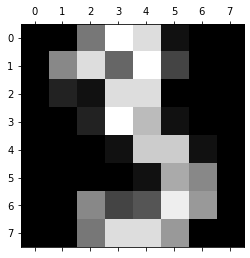

In [ ]:
pl.gray() # Queremos las imágenes en grises
pl.matshow(digits.images[3]) # Imprimir una imagen dada
numImagenes = len(digits.images) # Numero de imagenes, len es un método que provee el tamaño del arreglo
print("Se tienen en total:", numImagenes, "imágenes")
print(digits.images[3]) # Ver su representación en pixeles
print("target",digits["target"][3])

Observe cada atributo del objeto digits, recorra cada imagen y obtenga su representación (etiqueta)

DESARROLLO


In [ ]:
from sklearn.datasets import load_digits
import pylab as pl
import sklearn
import random
from collections import Counter
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
  def __init__(self, k=3):
      self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return np.array(y_pred)

  def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    k_idx = np.argsort(distances)[: self.k]
    k_neighbor_labels = [self.y_train[i] for i in k_idx]
    most_common = Counter(k_neighbor_labels).most_common(1)
    return most_common[0][0]


class Number:
  def __init__(self, number, matrix):
    self.number = number
    self.matrix = matrix




digits = load_digits()

limit_tra = int(len(digits["data"]) * 0.6)
limit_test = int(len(digits["data"]) - limit_tra)

processed_list = list()


for i in range(len(digits["data"])):
  processed_list.append(Number(digits["target"][i], digits["data"][i]))


train_dataset = random.sample(processed_list, limit_tra)
test_dataset = random.sample(processed_list, limit_test)

x_train = list()
y_train = list()
x_test = list()
y_test = list()

for item in train_dataset:
  x_train.append(item.matrix)
  y_train.append(item.number)

for item in test_dataset:
  x_test.append(item.matrix)
  y_test.append(item.number)


counter_9 = 0
counter_7 = 0

for item in train_dataset:
  if item.number == 9:
    counter_9 +=1

  if item.number == 7:
    counter_7 +=1


print("There are",counter_9,"nines (9) in this training dataset.")
print("There are",counter_7,"sevens (7) in this training dataset.")



k = 3
classification = KNN(k=k)
classification.fit(x_train, y_train)

x_real_test = list()

for i in range(len(x_test)):
  if y_test[i] == 9 or y_test[i] == 7:
    x_real_test.append(x_test[i])

predictions = classification.predict(x_real_test)



def counter_9_7(dataset):
  counter_9 = 0
  counter_7 = 0

  for item in dataset:
    if item == 9:
      counter_9 +=1

    if item == 7:
      counter_7 +=1
  my_tuple = [counter_9,counter_7]
  return my_tuple




def recall(y_true, y_pred):
  true_9_7 = counter_9_7(y_true)
  test_9_7 = counter_9_7(y_pred)

  vp = test_9_7[0] + test_9_7[1]
  fn = true_9_7[0] + true_9_7[1] - vp

  return vp/(vp+fn)




print("KNN classification (9 and 7) recall is",recall(y_test, predictions))









There are 113 nines (9) in this training dataset.
There are 110 sevens (7) in this training dataset.
KNN classification (9 and 7) recall is 0.9929078014184397
